# Tensor Image Display Test

This notebook tests the display of tensor-processed images in evcxr Jupyter notebook environment.

In [3]:
// Import necessary crates
:dep image = "0.23"
:dep evcxr_image = "1.1"
:dep burn = {path = "../../crates/burn"}
:dep burn-ndarray = {path = "../../crates/burn-ndarray"}
:dep burn-vision = {path = "../../crates/burn-vision", features = ["export-tests"]}

use image::{DynamicImage, GenericImageView, ImageBuffer, Luma, Rgb};
use evcxr_image::ImageDisplay;
use burn_vision::tests::{load_test_image, save_test_image};
use burn_ndarray::{NdArray, NdArrayDevice};
use burn::tensor::Tensor;

type Backend = NdArray<f32>;
let device = NdArrayDevice::Cpu;

println!("✅ All dependencies loaded successfully!");

✅ All dependencies loaded successfully!


Original image created (128x128)


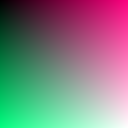

In [4]:
// Create a test image
let original_img = image::ImageBuffer::<image::Rgb<u8>, _>::from_fn(128, 128, |x, y| {
    let r = (x * 2) as u8;
    let g = (y * 2) as u8;
    let b = ((x + y) % 256) as u8;
    image::Rgb([r, g, b])
});

println!("Original image created (128x128)");
original_img

Tensor shape: Shape { dims: [128, 128, 3] }
✨ Brightened image:


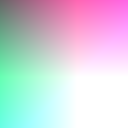

In [6]:
// Save and load as tensor
original_img.save("/tmp/test_original.png").unwrap();
let tensor = load_test_image::<Backend>("/tmp/test_original.png", &device, false);
println!("Tensor shape: {:?}", tensor.shape());

// Apply brightness adjustment
let tensor_chw = tensor.swap_dims(0, 2).swap_dims(1, 2); // Convert to [C, H, W]
let brightened_tensor = (tensor_chw + 0.4).clamp(0.0, 1.0);
let brightened_hwc = brightened_tensor.swap_dims(0, 2).swap_dims(0, 1); // Back to [H, W, C]

// Save and display
save_test_image("/tmp/brightened_test.png", brightened_hwc, false);
println!("✨ Brightened image:");

// Convert DynamicImage to ImageBuffer for proper display
let dynamic_img = image::open("/tmp/brightened_test.png").unwrap();
let rgb_img = dynamic_img.to_rgb8();
rgb_img

🎚️ Contrast enhanced image:


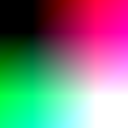

In [8]:
// Test contrast enhancement
// Reload the tensor since variables from previous cells are not in scope
let tensor = load_test_image::<Backend>("/tmp/test_original.png", &device, false);
let tensor_chw = tensor.swap_dims(0, 2).swap_dims(1, 2); // Convert to [C, H, W]

let contrast_tensor = ((tensor_chw - 0.5) * 2.0 + 0.5).clamp(0.0, 1.0);
let contrast_hwc = contrast_tensor.swap_dims(0, 2).swap_dims(0, 1);

save_test_image("/tmp/contrast_test.png", contrast_hwc, false);
println!("🎚️ Contrast enhanced image:");

// Convert DynamicImage to ImageBuffer for proper display
let dynamic_img = image::open("/tmp/contrast_test.png").unwrap();
let rgb_img = dynamic_img.to_rgb8();
rgb_img

🔄 BGR swapped image:


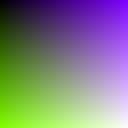

In [9]:
// Test channel swapping (RGB to BGR)
// Reload the tensor since variables from previous cells are not in scope
let tensor = load_test_image::<Backend>("/tmp/test_original.png", &device, false);
let tensor_chw = tensor.swap_dims(0, 2).swap_dims(1, 2); // Convert to [C, H, W]

let r_channel = tensor_chw.clone().narrow(0, 0, 1);
let g_channel = tensor_chw.clone().narrow(0, 1, 1);
let b_channel = tensor_chw.clone().narrow(0, 2, 1);
let bgr_tensor = Tensor::cat(vec![b_channel, g_channel, r_channel], 0);
let bgr_hwc = bgr_tensor.swap_dims(0, 2).swap_dims(0, 1);

save_test_image("/tmp/bgr_test.png", bgr_hwc, false);
println!("🔄 BGR swapped image:");

// Convert DynamicImage to ImageBuffer for proper display
let dynamic_img = image::open("/tmp/bgr_test.png").unwrap();
let rgb_img = dynamic_img.to_rgb8();
rgb_img

## Summary

This test notebook demonstrates:
1. ✅ Creating images programmatically
2. ✅ Converting images to tensors 
3. ✅ Applying tensor operations (brightness, contrast, channel swapping)
4. ✅ Converting back to images
5. ✅ Displaying processed images in the notebook

Each cell should show the processed image directly in the notebook output.